In [1]:
import sys

sys.path.append("../..")

import numpy as np
import matplotlib.pyplot as plt
from scripts.neuralnetwork.led import LED

In [2]:
# Specify the path of the dataset
path_data = "../../dataset/VDP_testset/VDP_testset_0.npz"

# Specify the name of the pre-trained autoencoder and RNN
# ae_name = "VDP_ae_identity"
rnn_name = "VDP_rnn"

# Specify the desired length of the prediction
length_prediction = 180

# Instantiate the LED object
led = LED(
    rnn_name=rnn_name, length_prediction=length_prediction
)

In [3]:
# Upload the data
led.get_data(path_data, compressed_name="data")

In [4]:
# Run the LED
led.run(identity=True) # 

In [5]:
# Compute the errors
errParticle,errSnapshot,errModel = led.compute_error()

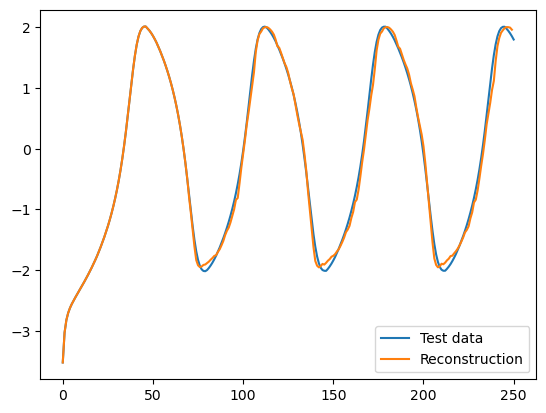

In [6]:
# Plot the real data vs the predicted one

plt.plot(np.arange(0, np.shape(led.data)[0]), led.data[:, 0])
plt.plot(np.arange(0, np.shape(led.forecast)[0]), led.forecast[:, 0])
plt.legend(["Test data", "Reconstruction"])
plt.show()